# Elastic Cross-section Data Comparison

Kurtis Bartlett

2017/3/12

Ipython notebook for generating plot of elastic Aluminum cross-section measurements compared with model.

In [1]:
# Import necessary packages and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Use text and computer modern for text formating
pp.rcParams["text.usetex"] = "True"
pp.rcParams["font.family"] = "serif"
pp.rcParams["font.serif"] = "Computer Modern Roman"
pp.rcParams["font.sans-serif"] = "Computer Modern Sans serif"

In [3]:
# Keep matplotlib plots inline
%matplotlib inline

In [4]:
pp.style.use('seaborn-ticks')
sns.set_palette("muted")
plot_size = 6*np.array([1.0,(2.0/(1.0+np.sqrt(5.0)))]) #Use Golden ratio as aspect ratio for plots

In [5]:
# Define contants (2014 PDG)
alpha = 1/137.035999074
cc = 197.3269718 # MeV fm
cc_sq = 0.389379338 # GeV^2 mbarn
m_p = 0.938272046 # Gev/c^2
J = 5.0/2.0 # Aluminum-27 nuclear spin
Z = 13 # Aluminum # of protons
N = 14 # Aluminum # of neutrons
A = 27 # Aluminum atomic mass
# T. Stovall et. al values
r = 2.98*(1000.0/cc) # [fm]->[1/GeV] RMS radius
a_p_sq = 0.427*(1000.0/cc)*(1000.0/cc) # [fm^2]->[1/GeV^2]
Q = 14.6*(1000.0/cc)*(1000.0/cc) # [fm^2]->[1/GeV^2] Electric quadrupole moment
gamma = 2.792847356 # [n.m.] Proton magnetic moment
mu = 4.79 # [n.m.] Aluminum Nuclear magnetic moment (theortical) or 3.69 [n.m.] (measured)

# Fourier Bessel Xsection values
R_max = 7.0 # *(1000.0/cc) # [fm]->[1/GeV] Aluminum

In [6]:
# Define functions
def q_squared(energy, theta):
    'Energy[GeV], Theta[Degrees]'
    one_vec = np.ones(len(theta))
    numerator = one_vec-np.cos(np.deg2rad(theta))
    denominator = one_vec+(energy/(m_p*one_vec))*numerator
    qq = (2.0*one_vec)*energy*energy*(numerator/denominator)
    return qq

def percent_diff(data, model):
    pdiff = 100*((data-model)/data)
    return pdiff

def percent_diff_err(data, model, data_err, model_err):
    one_vec = np.ones(len(data))
    pdiff_err_sq = np.square(data_err)*np.square((100.0*one_vec*model)/np.square(data)) + np.square(model_err)*np.square((-100.0*one_vec)/data)
    return np.sqrt(pdiff_err_sq)

def mott_xsection(energy, theta):
    'Energy[GeV], Theta[Degrees]'
    one_vec = np.ones(len(theta))
    numerator = alpha*alpha*one_vec*np.cos(np.deg2rad(theta)/(2.0*one_vec))*np.cos(np.deg2rad(theta)/(2.0*one_vec))
    denominator = 4*one_vec*energy*energy*np.power(np.sin(np.deg2rad(theta)/(2.0*one_vec)),4)
    xsection = (1000*cc_sq*one_vec)*(numerator/denominator) #Convert to mubarns/sr
    return xsection

def stovall_electric_xsection(energy, theta):
    'Energy[GeV], Theta[Degrees]'
    one_vec = np.ones(len(theta))
    
    qq = q_squared(energy, theta) # [GeV^2]
    
    kk = qq*np.square(one_vec+((((3.0*Z*alpha)/(2.0*r))*one_vec)/energy)) # [GeV^2]
    
    a_0_sq = (r*r - 1.5*a_p_sq)/(3.5-(10.0/Z)-(3.0/(2.0*A))) # [1/GeV^2]
    
    x = 0.25*one_vec*kk*a_0_sq # Simple Harmonic Oscillator term [unitless]
    
    F_E0 = ((1.0*one_vec)/(Z*one_vec))*np.exp(-1.0*one_vec*x)*(Z*one_vec-(4.0/3.0)*(Z-5.0)*one_vec*x+(4.0/15.0)*(Z-8.0)*one_vec*x*x)
    F_E2 = (one_vec-(2.0/7.0)*one_vec*x)*np.exp(-1.0*one_vec*x)
    
    C_fp = np.exp(-0.25*a_p_sq*one_vec*kk) # Fine proton size correction
    C_nt = np.exp(x/(A*one_vec)) # Non-translational invariance correction

    F_E0_corr = F_E0*C_fp*C_nt # Corrected F_0 form factor
    F_E2_corr = F_E2*C_fp*C_nt # Corrected F_2 form factor
    
    F_E_sq = F_E0_corr*F_E0_corr + (7.0/450.0)*((Q*Q)/(Z*Z))*one_vec*kk*kk*F_E2_corr*F_E2_corr # Electric Form factor
    
    xsection = Z*Z*one_vec*mott_xsection(energy, theta)*F_E_sq
    return xsection

def stovall_xsection(energy, theta):
    'Energy[GeV], Theta[Degrees]'
    one_vec = np.ones(len(theta))
    
    qq = q_squared(energy, theta) # [GeV^2]
    
    kk = qq*np.square(one_vec+((((3.0*Z*alpha)/(2.0*r))*one_vec)/energy)) # [GeV^2]
    
    a_0_sq = (r*r - 1.5*a_p_sq)/(3.5-(10.0/Z)-(3.0/(2.0*A))) # [1/GeV^2]
    
    x = 0.25*one_vec*kk*a_0_sq # Simple Harmonic Oscillator term [unitless]
    
    Omega = (-3.0/2.0)*(1.0+2.0*gamma)*a_0_sq
    Gamma = (15.0/4.0)*gamma*a_0_sq*a_0_sq
    
    # Electric Form Factors
    F_E0 = ((1.0*one_vec)/(Z*one_vec))*np.exp(-1.0*one_vec*x)*(Z*one_vec-(4.0/3.0)*(Z-5.0)*one_vec*x+(4.0/15.0)*(Z-8.0)*one_vec*x*x)
    F_E2 = (one_vec-(2.0/7.0)*one_vec*x)*np.exp(-1.0*one_vec*x)
    
    # Magnetic Form Factors
    F_M1 = (one_vec - ((2.0*(1.0+2.0*gamma))/(5.0*(1.0+0.5*gamma)))*one_vec*x + ((6.0*gamma)/(35*(1.0+0.5*gamma)))*one_vec*x*x)*np.exp(-1.0*one_vec*x)
    F_M3 = (one_vec - ((2.0*gamma)/(3.0*(1.0+2.0*gamma)))*one_vec*x)*np.exp(-1.0*one_vec*x)
    F_M5 = np.exp(-1.0*one_vec*x)
    
    C_fp = np.exp(-0.25*a_p_sq*one_vec*kk) # Fine proton size correction
    C_nt = np.exp(x/(A*one_vec)) # Non-translational invariance correction

    F_E0_corr = F_E0*C_fp*C_nt # Corrected F_0 form factor
    F_E2_corr = F_E2*C_fp*C_nt # Corrected F_2 form factor
    F_M1_corr = F_M1*C_fp*C_nt # Corrected F_M1 form factor
    F_M3_corr = F_M3*C_fp*C_nt # Corrected F_M3 form factor
    F_M5_corr = F_M5*C_fp*C_nt # Corrected F_M5 form factor
    
    F_E_sq = F_E0_corr*F_E0_corr + (7.0/450.0)*((Q*Q)/(Z*Z))*one_vec*kk*kk*F_E2_corr*F_E2_corr # Electric Form factor
    F_M_sq = F_M1_corr*F_M1_corr + (4.0/525.0)*((Omega*Omega)/(mu*mu))*one_vec*kk*kk*F_M3_corr*F_M3_corr + (2.0/33075.0)*((Gamma*Gamma)/(mu*mu))*kk*kk*kk*kk*F_M5_corr*F_M5_corr
    
    C_mag = ((7.0/5.0)*((mu*mu)/(12.0*m_p*m_p))*one_vec)*(one_vec + 2.0*one_vec*np.tan(np.deg2rad(theta)/(2.0*one_vec))*np.tan(np.deg2rad(theta)/(2.0*one_vec)))*kk
    
    xsection = mott_xsection(energy, theta)*(Z*Z*one_vec*F_E_sq + C_mag*F_M_sq)
    return xsection

def fourier_bessel_xsection(energy, theta, v, a):
    'Energy[GeV], Theta[Degrees], Fourier Bessel coefficients[unitless]'
    one_vec = np.ones(len(theta))
    
    qq = q_squared(energy, theta) # [GeV^2]
    q = (1000.0/cc)*np.sqrt(qq) #[GeV]->[1/fm]
    fb_sum = 0.0
    for i in range(len(v)):
        numerator = np.power(-1.0,v[i]+1)*np.sin(R_max*one_vec*q)
        denominator = (((v[i]*np.pi)/R_max)*one_vec - q)*(((v[i]*np.pi)/R_max)*one_vec + q)
        fb_sum = fb_sum + a[i]*(numerator/denominator)
    F_bessel = ((4.0*np.pi)/Z)*one_vec*(1/q)*fb_sum
    
    xsection = Z*Z*one_vec*mott_xsection(energy, theta)*F_bessel*F_bessel

    return xsection

In [7]:
lombard_data = pd.read_csv('lombard_al_elastic_data.csv')
li_data = pd.read_csv('li_yearian_sick_al_elastic_data.csv')
fourier_bessel_coeff = pd.read_csv('aluminum_fourier_bessel_coefficients.csv')

In [34]:
#lombard_data[:]
#li_data[:]

In [8]:
lombard_calc_qq = q_squared(lombard_data.energy/1000.0, lombard_data.theta)
li_calc_qq = q_squared(li_data.energy/1000.0, li_data.theta)

li_stovall_electric_xsection = stovall_electric_xsection(li_data.energy/1000.0, 
                                                         li_data.theta)
lombard_stovall_electric_xsection = stovall_electric_xsection(lombard_data.energy/1000.0, 
                                                              lombard_data.theta)
li_stovall_xsection = stovall_xsection(li_data.energy/1000.0, 
                                                         li_data.theta)
lombard_stovall_xsection = stovall_xsection(lombard_data.energy/1000.0, 
                                                              lombard_data.theta)
li_fb_xsection = fourier_bessel_xsection(li_data.energy/1000.0,
                                         li_data.theta,
                                         fourier_bessel_coeff.v,
                                         fourier_bessel_coeff.a)
lombard_fb_xsection = fourier_bessel_xsection(lombard_data.energy/1000.0,
                                              lombard_data.theta,
                                              fourier_bessel_coeff.v,
                                              fourier_bessel_coeff.a)

li_stovall_electric_pdiff = percent_diff(li_data.xsection*1000.0,
                                         li_stovall_electric_xsection)
lombard_stovall_electric_pdiff = percent_diff(lombard_data.xsection,
                                              lombard_stovall_electric_xsection)
li_fb_pdiff = percent_diff(li_data.xsection*1000.0,
                           li_fb_xsection)
lombard_fb_pdiff = percent_diff(lombard_data.xsection,
                                lombard_fb_xsection)

li_stovall_electric_pdiff_err = percent_diff_err(li_data.xsection*1000.0,
                                                 li_stovall_electric_xsection,
                                                 li_data.xsection_err*1000.0,
                                                 np.zeros(len(li_stovall_electric_xsection)))
lombard_stovall_electric_pdiff_err = percent_diff_err(lombard_data.xsection,
                                                      lombard_stovall_electric_xsection,
                                                      lombard_data.xsection_err,
                                                      np.zeros(len(lombard_stovall_electric_xsection)))
li_fb_pdiff_err = percent_diff_err(li_data.xsection*1000.0,
                                   li_fb_xsection,
                                   li_data.xsection_err*1000.0,
                                   np.zeros(len(li_fb_xsection)))
lombard_fb_pdiff_err = percent_diff_err(lombard_data.xsection,
                                        lombard_fb_xsection,
                                        lombard_data.xsection_err,
                                        np.zeros(len(lombard_fb_xsection)))

In [9]:
qweak_theta = [5.8, 11.6]
qweak_energy = [1.16, 1.16]
qweak_calc_qq = q_squared(qweak_energy,qweak_theta)

In [37]:
#qweak_calc_qq[:]

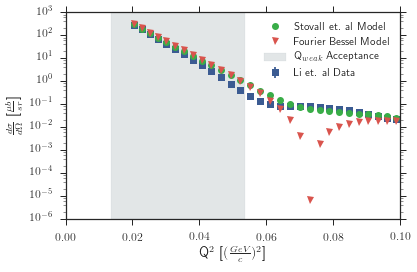

In [10]:
pp.figure(figsize=plot_size)
pp.errorbar(li_calc_qq, 
    li_data.xsection*1000, #Convert to mu barns/sr 
    yerr=li_data.xsection_err, 
    ls='None', 
    marker='s',
    label='Li et. al Data', 
    color=sns.xkcd_rgb['denim blue'])
pp.plot(li_calc_qq, 
    li_stovall_electric_xsection, 
    ls='None',
    marker='o',
    color=sns.xkcd_rgb['medium green'], 
    label='Stovall et. al Model')
pp.plot(li_calc_qq, 
    li_fb_xsection, 
    ls='None',
    marker='v',
    color=sns.xkcd_rgb['pale red'], 
    label='Fourier Bessel Model')
pp.yscale('log')
pp.xlim(0.00, 0.1)
[y_low,y_high] = pp.ylim()
pp.fill_between(qweak_calc_qq, 
    y_low, 
    y_high,
    label='Q$_{weak}$ Acceptance',
    color=sns.xkcd_rgb['steel grey'],
    alpha=0.2)
pp.legend(loc='upper right', fontsize=11)
pp.xlabel('Q$^{2}$ [$(\\frac{GeV}{c})^{2}$]',fontsize=14)
pp.ylabel('$\\frac{d\\sigma}{d\\Omega}$ [$\\frac{\\mu b}{sr}$]', fontsize=14)
pp.xticks(fontsize=12)
pp.yticks(fontsize=12)
pp.savefig('li_cross_section_compare_plot.png', bbox_inches='tight')
pp.savefig('li_cross_section_compare_plot.pdf', bbox_inches='tight')
pp.show()

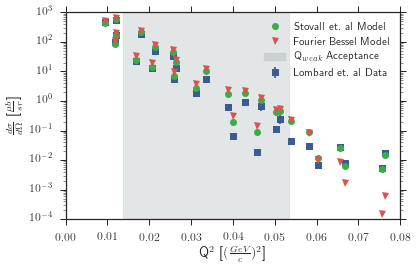

In [13]:
pp.figure(figsize=plot_size)
pp.errorbar(lombard_calc_qq, 
    lombard_data.xsection, 
    yerr=lombard_data.xsection_err, 
    ls='None', marker='s', 
    label='Lombard et. al Data', 
    color=sns.xkcd_rgb['denim blue'])
pp.plot(lombard_calc_qq, 
    lombard_stovall_electric_xsection, 
    ls='None', 
    marker='o', 
    color=sns.xkcd_rgb['medium green'], 
    label='Stovall et. al Model')
pp.plot(lombard_calc_qq, 
    lombard_fb_xsection, 
    ls='None', 
    marker='v', 
    color=sns.xkcd_rgb['pale red'], 
    label='Fourier Bessel Model')
pp.yscale('log')
#pp.xlim(0.00, 0.205)
[y_low,y_high] = pp.ylim()
pp.fill_between(qweak_calc_qq, 
    y_low, 
    y_high,
    label='Q$_{weak}$ Acceptance',
    color=sns.xkcd_rgb['steel grey'],
    alpha=0.2)
pp.legend(loc='upper right', fontsize=11)
pp.xlabel('Q$^{2}$ [$(\\frac{GeV}{c})^{2}$]',fontsize=14)
pp.ylabel('$\\frac{d\\sigma}{d\\Omega}$ [$\\frac{\\mu b}{sr}$]', fontsize=14)
pp.xticks(fontsize=12)
pp.yticks(fontsize=12)
pp.savefig('lombard_cross_section_compare_plot.png', bbox_inches='tight')
pp.savefig('lombard_cross_section_compare_plot.pdf', bbox_inches='tight')
pp.show()

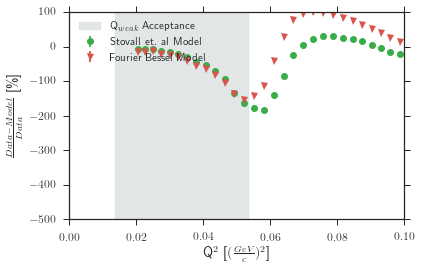

In [11]:
pp.figure(figsize=plot_size)
pp.errorbar(li_calc_qq, 
        li_stovall_electric_pdiff, 
        yerr=li_stovall_electric_pdiff_err,
        ls='None', 
        marker = 'o', 
        color=sns.xkcd_rgb['medium green'], 
        label='Stovall et. al Model')
pp.errorbar(li_calc_qq, 
        li_fb_pdiff, 
        yerr=li_fb_pdiff_err,
        ls='None', 
        marker = 'v', 
        color=sns.xkcd_rgb['pale red'], 
        label='Fourier Bessel Model')
pp.xlim(0.00, 0.1)
[y_low,y_high] = pp.ylim()
pp.fill_between(qweak_calc_qq, 
                y_low, 
                y_high,
                label='Q$_{weak}$ Acceptance',
                color=sns.xkcd_rgb['steel grey'],
                alpha=0.2)
pp.legend(loc='upper left', fontsize=11)
pp.xlabel('Q$^{2}$ [$(\\frac{GeV}{c})^{2}$]',fontsize=14)
pp.ylabel('$\\frac{Data-Model}{Data}$ [\%]', fontsize=14)
pp.xticks(fontsize=12)
pp.yticks(fontsize=12)
pp.savefig('li_cross_section_pdiff_plot.png', bbox_inches='tight')
pp.savefig('li_cross_section_pdiff_plot.pdf', bbox_inches='tight')
pp.show()

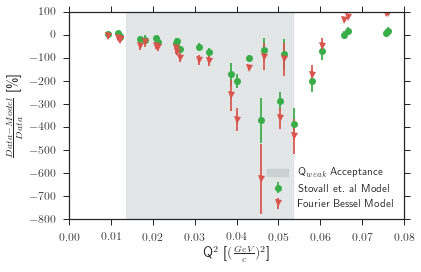

In [12]:
pp.figure(figsize=plot_size)
pp.errorbar(lombard_calc_qq, 
        lombard_stovall_electric_pdiff,
        yerr=lombard_stovall_electric_pdiff_err,
        ls='None', 
        marker='o', 
        color=sns.xkcd_rgb['medium green'], 
        label='Stovall et. al Model')
pp.errorbar(lombard_calc_qq, 
        lombard_fb_pdiff,
        yerr=lombard_fb_pdiff_err,
        ls='None', 
        marker='v', 
        color=sns.xkcd_rgb['pale red'], 
        label='Fourier Bessel Model')
#pp.xlim(0.00, 0.205)
[y_low,y_high] = pp.ylim()
pp.fill_between(qweak_calc_qq, 
                y_low, 
                y_high,
                label='Q$_{weak}$ Acceptance',
                color=sns.xkcd_rgb['steel grey'],
                alpha=0.2)
pp.legend(loc='lower right', fontsize=11)
pp.xlabel('Q$^{2}$ [$(\\frac{GeV}{c})^{2}$]',fontsize=14)
pp.ylabel('$\\frac{Data-Model}{Data}$ [\%]', fontsize=14)
pp.xticks(fontsize=12)
pp.yticks(fontsize=12)
pp.savefig('lombard_cross_section_pdiff_plot.png', bbox_inches='tight')
pp.savefig('lombard_cross_section_pdiff_plot.pdf', bbox_inches='tight')
pp.show()